# 4.1.4.1 Support Vector Regression (SVR)
#### Explanation of Support Vector Regression (SVR) and Its Scenarios

**Support Vector Regression (SVR)** is a type of Support Vector Machine (SVM) used for regression tasks. Unlike linear regression, which aims to minimize the error between predicted and actual values, SVR attempts to fit the error within a certain threshold. It does this by finding a hyperplane that best fits the data within a margin of tolerance (epsilon (ε) )

<hr>
<hr>

## Support Vector Machine - Classifier (SVC):
- [Simplifying Support Vector Machines](https://readmedium.com/en/https:/towardsdatascience.com/support-vector-machines-svm-ml-basics-machine-learning-data-science-getting-started-1683fc99cd45)
- [Support Vector Machines (SVM): An Intuitive Explanation](https://medium.com/low-code-for-advanced-data-science/support-vector-machines-svm-an-intuitive-explanation-b084d6238106)
- [What is Kernel Trick in SVM ?](https://medium.com/@Suraj_Yadav/what-is-kernel-trick-in-svm-interview-questions-related-to-kernel-trick-97674401c48d)
- [Support Vector Machines](https://medium.com/@pingsubhak/support-vector-machines-eae13985a917)
- [Support Vector Machine (SVM), Clearly Explained!](https://python.plainenglish.io/support-vector-machine-svm-clearly-explained-d9db9123b7ac)
- [Understanding the mathematics behind Support Vector Machines](https://shuzhanfan.github.io/2018/05/understanding-mathematics-behind-support-vector-machines/)
- ### Youtube:
  - [Support Vector Machine (SVM) in 2 minutes](https://www.youtube.com/watch?v=_YPScrckx28)
  - [The Kernel Trick in Support Vector Machine (SVM)](https://www.youtube.com/watch?v=Q7vT0--5VII)
  - [Support Vector Machines: All you need to know!](https://www.youtube.com/watch?v=ny1iZ5A8ilA)

## Support Vector Regression (SVR):
- [Implementing Support Vector Regression for Predictions](https://medium.com/@niousha.rf/support-vector-regressor-theory-and-coding-exercise-in-python-ca6a7dfda927)
- [Using Support Vector Machine for Regression Problems](https://towardsdatascience.com/unlocking-the-true-power-of-support-vector-regression-847fd123a4a0)
- [Support Vector Machine (SVM), Clearly Explained! (Second half of the article)](https://python.plainenglish.io/support-vector-machine-svm-clearly-explained-d9db9123b7ac)

<hr>
<hr>



**Key Concepts**:
- **Hyperplane**: The line (in 2D) or plane (in higher dimensions) that SVR uses to predict the target variable.
- **Epsilon (ε)**: The margin of tolerance within which errors are tolerated. The goal is to find a hyperplane that has the maximum number of points within this epsilon margin.
- **Support Vectors**: Data points that are closest to the hyperplane and are most informative in determining the position of the hyperplane.

**Scenarios Where SVR is Applicable**:
- **Non-linear Relationships**: SVR can handle non-linear relationships between features and the target variable using kernel functions.
- **High-dimensional Data**: Effective in cases where the number of features is large compared to the number of samples.
- **Robust to Outliers**: SVR is less sensitive to outliers compared to traditional regression methods.

In this section, we will implement Support Vector Regression using `sklearn`, demonstrating how it can be applied to regression tasks.


In [1]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
# Generating some random data for demonstration
np.random.seed(0)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
Y = np.sin(X).ravel()
Y[::5] += 3 * (0.5 - np.random.rand(20))  # Adding some noise to the data

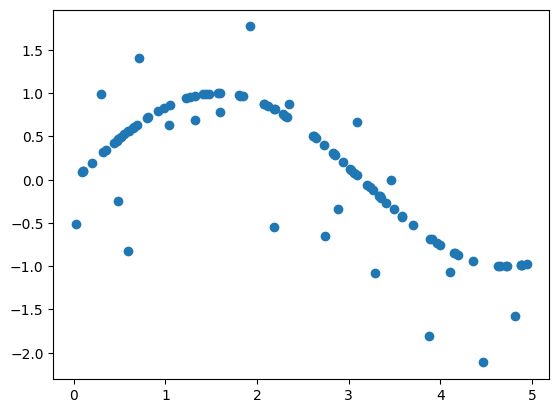

In [3]:
plt.scatter(X,Y)
plt.show()

In [4]:
# Standardizing the features
scaler_X = StandardScaler()
scaler_Y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y.reshape(-1, 1)).ravel()

In [5]:
# Creating a Support Vector Regressor model
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1)

# Fitting the model
svr_model.fit(X_scaled, Y_scaled)

# Predicting
Y_pred_svr_scaled = svr_model.predict(X_scaled)

# Inversing the scaling of predictions
Y_pred_svr = scaler_Y.inverse_transform(Y_pred_svr_scaled.reshape(-1, 1)).ravel()

# Evaluating the model
mse_svr = mean_squared_error(Y, Y_pred_svr)
r2_svr = r2_score(Y, Y_pred_svr)

print(f"Mean Squared Error (SVR): {mse_svr}")
print(f"R-squared (SVR): {r2_svr}")

Mean Squared Error (SVR): 0.11773117575367863
R-squared (SVR): 0.8010504169770325


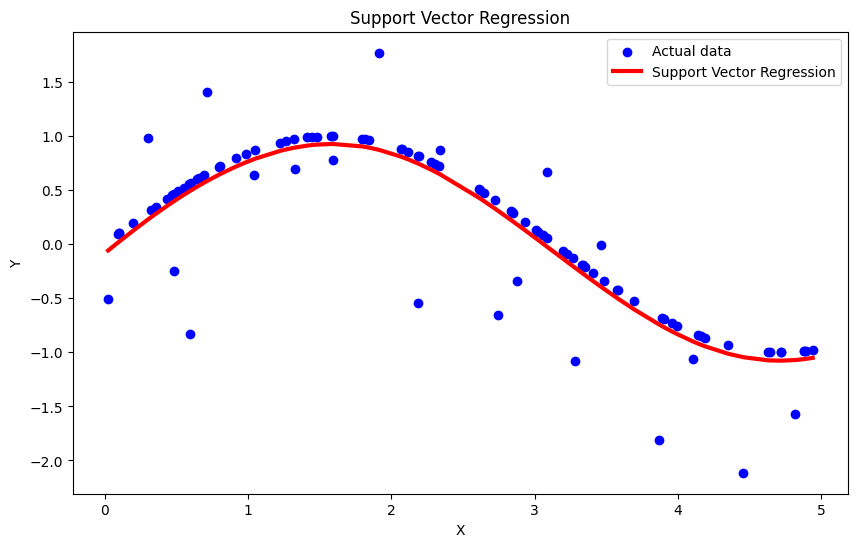

In [6]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Actual data')
plt.plot(X, Y_pred_svr, color='red', linewidth=3, label='Support Vector Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

#### Visualizing Support Vectors and Margins in Support Vector Regression

To better understand the working of Support Vector Regression (SVR), we can visualize the support vectors and the epsilon margin. Support vectors are the data points closest to the hyperplane and the epsilon margin, within which the model tries to fit the data points. 


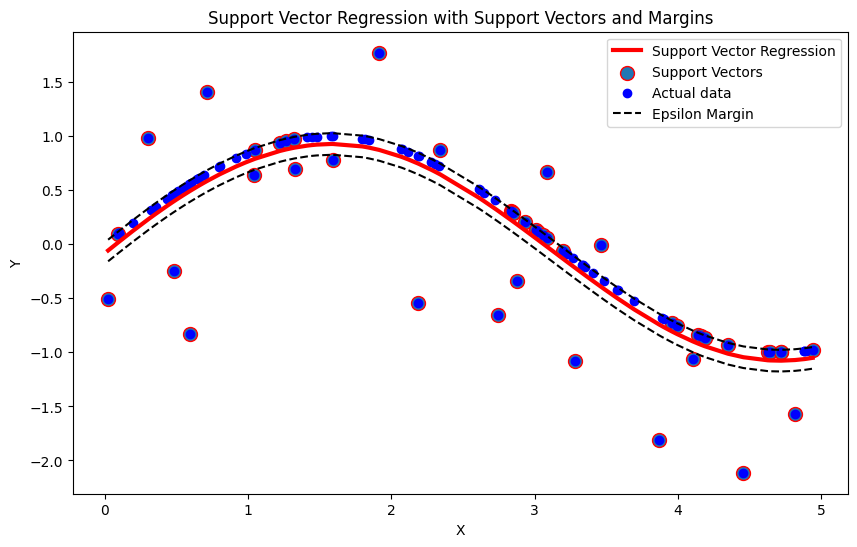

In [7]:
# Identifying support vectors
support_vectors = svr_model.support_

# Plotting the results
plt.figure(figsize=(10, 6))

plt.plot(X, Y_pred_svr, color='red', linewidth=3, label='Support Vector Regression')
plt.scatter(X[support_vectors], Y[support_vectors], color=None, edgecolor='r', s=100, label='Support Vectors')
plt.scatter(X, Y, color='blue', label='Actual data')

# Plotting epsilon-tube (margins)
epsilon = svr_model.epsilon
plt.plot(X, Y_pred_svr + epsilon, 'k--', label='Epsilon Margin')
plt.plot(X, Y_pred_svr - epsilon, 'k--')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Support Vector Regression with Support Vectors and Margins')
plt.legend()
plt.show()

# Conclusion

Support Vector Regression (SVR) is a powerful regression technique that utilizes the principles of Support Vector Machines to handle both linear and non-linear relationships. In this example, we implemented SVR using the `sklearn` library, trained the model on synthetic data, and evaluated its performance using mean squared error (MSE) and R-squared metrics.

Key highlights include:
- **Model Performance**: SVR effectively captures complex relationships in the data and handles noise well.
- **Implementation**: We used the `SVR` class from `sklearn.svm` and demonstrated the importance of feature scaling for SVR.
- **Benefits**: SVR is robust to outliers and performs well in high-dimensional feature spaces, making it suitable for various regression tasks.

Exploring different kernel functions (e.g., linear, polynomial, RBF) and tuning parameters like `C` and `epsilon` can further optimize the model's performance for specific datasets.

